In [7]:
# Import necessary libraries
import pandas as pd

In [8]:
# File paths
customers_file = r"D:\Company assignments\Zeotap_Data_science_assignment\data\Customers.csv"
products_file = r"D:\Company assignments\Zeotap_Data_science_assignment\data\Products.csv"
transactions_file = r"D:\Company assignments\Zeotap_Data_science_assignment\data\Transactions.csv"


In [9]:
# Load datasets
customers = pd.read_csv(customers_file)
products = pd.read_csv(products_file)
transactions = pd.read_csv(transactions_file)

In [10]:
# Function to inspect datasets
def inspect_data(df, name):
    print(f"Dataset: {name}")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.tolist())
    print(df.head(), "\n")
    print(df.info(), "\n")
    print(df.describe(include='all'), "\n")
    print(f"Missing values:\n{df.isnull().sum()}\n")
    print("="*50)

In [11]:
# Inspect each dataset
print("Inspecting Customers Data:")
inspect_data(customers, "Customers")

print("Inspecting Products Data:")
inspect_data(products, "Products")

print("Inspecting Transactions Data:")
inspect_data(transactions, "Transactions")

# Check relationships
# Unique IDs
print(f"Unique Customers in Customers.csv: {customers['CustomerID'].nunique()}")
print(f"Unique Products in Products.csv: {products['ProductID'].nunique()}")
print(f"Unique Transactions in Transactions.csv: {transactions['TransactionID'].nunique()}\n")

# Merging datasets to check relationships
customer_transactions = pd.merge(transactions, customers, on="CustomerID", how="left")
product_transactions = pd.merge(transactions, products, on="ProductID", how="left")

print("Customer-Transactions Merged Preview:\n", customer_transactions.head())
print("Product-Transactions Merged Preview:\n", product_transactions.head())

Inspecting Customers Data:
Dataset: Customers
Shape: (200, 4)
Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

       CustomerID      CustomerName         Region  SignupDate
count         200               200           

### Plot

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots render in the notebook
%matplotlib inline


In [13]:
# Convert SignupDate and TransactionDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

Customer Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


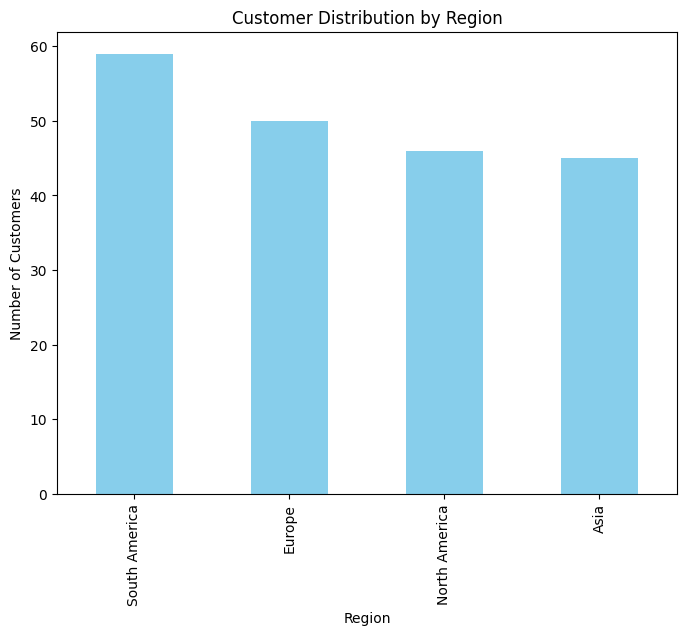

In [14]:
# 1. Explore Customer Demographics
print("Customer Region Distribution:")
region_counts = customers['Region'].value_counts()
print(region_counts)

# Plot customer distribution by region
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

Product Category Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


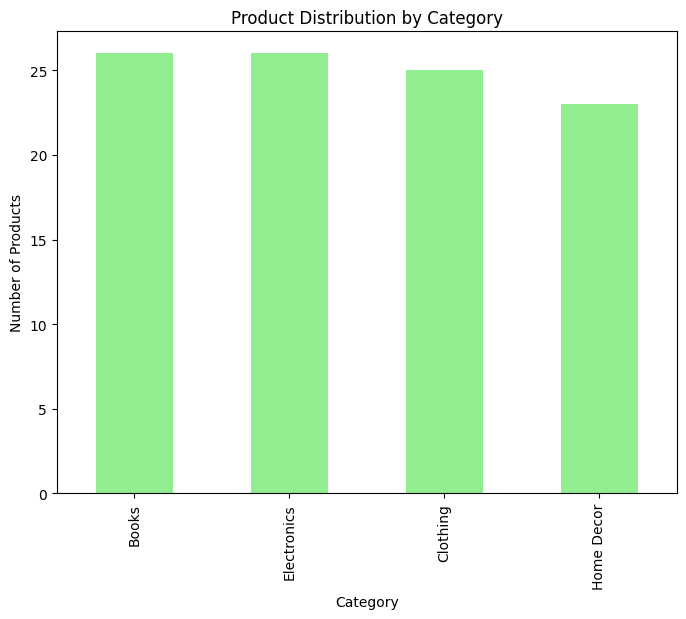

In [15]:
# 2. Analyze Product Categories
print("Product Category Distribution:")
category_counts = products['Category'].value_counts()
print(category_counts)

# Plot product category distribution
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='lightgreen')
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

Transaction Trends Over Time:
TransactionDate
2023-12-30    1
2023-12-31    3
2024-01-01    4
2024-01-02    4
2024-01-03    4
dtype: int64


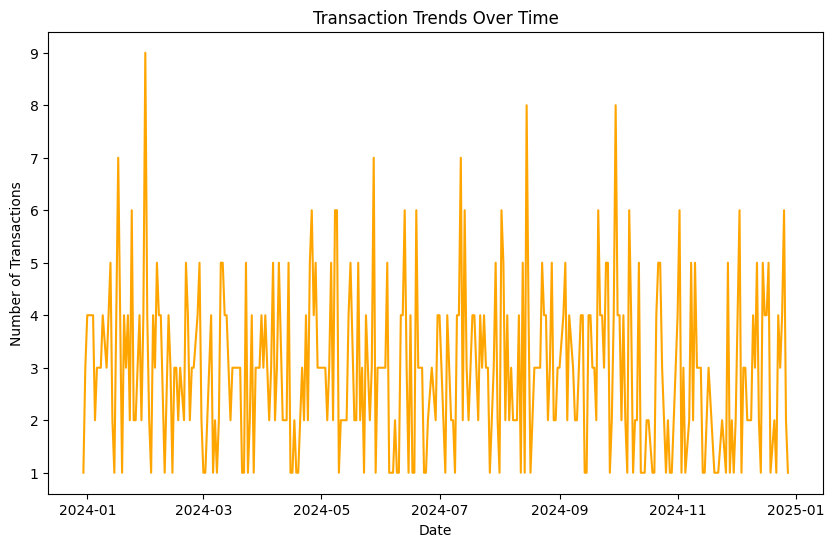

In [16]:
# 3. Transaction Trends Over Time
print("Transaction Trends Over Time:")
transactions_by_date = transactions.groupby(transactions['TransactionDate'].dt.date).size()
print(transactions_by_date.head())

# Plot transaction trends
plt.figure(figsize=(10, 6))
transactions_by_date.plot(color='orange')
plt.title("Transaction Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

Top 5 High-Value Customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


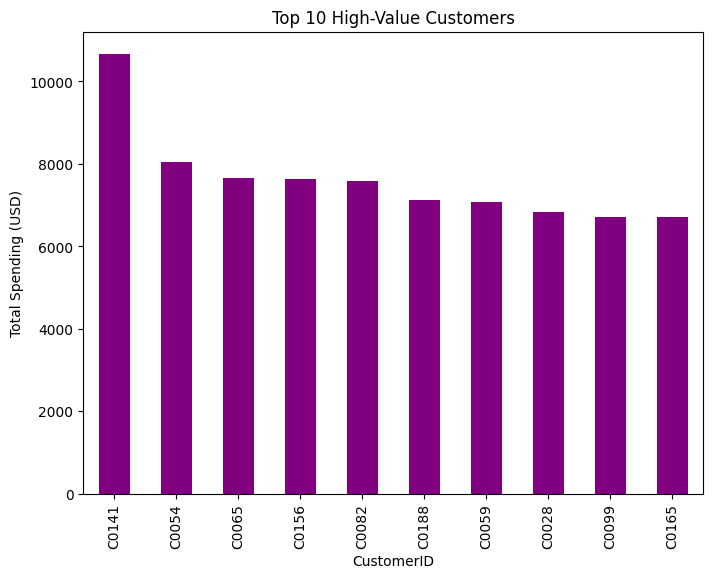

In [17]:
# 4. High-Value Customers
transactions['TotalValue'] = transactions['Quantity'] * transactions['Price']
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("Top 5 High-Value Customers:\n", customer_spending.head())

# Plot high-value customers
plt.figure(figsize=(8, 6))
customer_spending.head(10).plot(kind='bar', color='purple')
plt.title("Top 10 High-Value Customers")
plt.xlabel("CustomerID")
plt.ylabel("Total Spending (USD)")
plt.show()

Top 10 Popular Products:
   ProductID  Quantity            ProductName     Category   Price
0      P054        46     SoundWave Cookbook        Books   57.30
1      P059        46        SoundWave Jeans     Clothing  303.20
2      P029        45     TechPro Headphones  Electronics  433.64
3      P048        43       TechPro Cookbook        Books  416.40
4      P057        43  ActiveWear Smartphone  Electronics  239.70
5      P061        43    HomeSense Desk Lamp   Home Decor  156.96
6      P079        43         ActiveWear Rug   Home Decor  417.37
7      P062        39        HomeSense Novel        Books  374.16
8      P020        38      ActiveWear Jacket     Clothing  396.34
9      P028        38    HomeSense Desk Lamp   Home Decor  235.58


C:\Users\ayush\AppData\Local\Temp\ipykernel_22264\1681323396.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_products, x='ProductName', y='Quantity', palette='viridis')


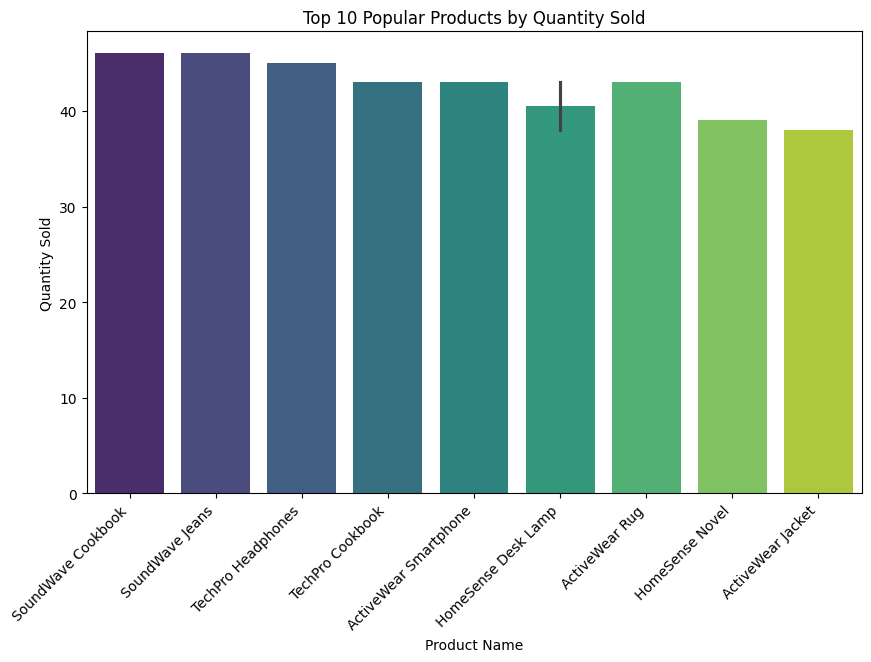

In [18]:
# 5. Product Popularity
product_sales = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
popular_products = pd.merge(product_sales.head(10).reset_index(), products, on='ProductID', how='left')
print("Top 10 Popular Products:\n", popular_products)

# Plot popular products
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_products, x='ProductName', y='Quantity', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Popular Products by Quantity Sold")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.show()